In [1]:
import numpy as np
import pandas as pd

In [2]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt,nInst) = df.shape
    return (df.values).T

pricesFile="./prices.txt"
prices = loadPrices(pricesFile)

train_prices = prices[:, :500]
test_prices = prices[:, 500:]

In [4]:
import plotly.express as px

# Create a DataFrame for plotting, columns are series, rows are time points
df_train = pd.DataFrame(train_prices.T)
fig = px.line(df_train, labels={'index': 'Time', 'value': 'Price', 'variable': 'Series'})
fig.update_layout(title='Train Prices for All Series')
fig.show()

In [8]:
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

for i in range(prices.shape[0]):
    for j in range(i+1, prices.shape[0]):
        if i != j:
            cointegration = coint(prices[i], prices[j])
            if cointegration[1] < 0.01:
                print(f"Cointegration found between series {i} and {j} with p-value: {cointegration[1]}")

Cointegration found between series 2 and 6 with p-value: 0.0079986390373881
Cointegration found between series 8 and 34 with p-value: 0.0006693879981640924
Cointegration found between series 11 and 23 with p-value: 0.00517660411808456
Cointegration found between series 18 and 29 with p-value: 0.004989130410274034
Cointegration found between series 18 and 30 with p-value: 0.007117594465041417
Cointegration found between series 25 and 36 with p-value: 0.00734041740470147
Cointegration found between series 25 and 48 with p-value: 0.00040273887568956863
Cointegration found between series 25 and 49 with p-value: 0.003628861779440911
Cointegration found between series 33 and 35 with p-value: 0.0011917409320930667
Cointegration found between series 33 and 36 with p-value: 0.004101550379214606
Cointegration found between series 33 and 38 with p-value: 0.001686049677002724
Cointegration found between series 33 and 40 with p-value: 0.0032745095217605025
Cointegration found between series 33 and 

Rolling cointegration

In [5]:
from statsmodels.tsa.stattools import coint

def rolling_cointegration(data1, data2, window_length):
    rolling_coint_scores = []
    rolling_p_values = []

    for end in range(window_length, len(data1)):
        start = end - window_length
        series1 = data1[start:end]
        series2 = data2[start:end]
        score, p_value, _ = coint(series1, series2)
        rolling_coint_scores.append(score)

        rolling_p_values.append(p_value)
    
    return rolling_p_values

window_length = 120
ndays = test_prices.shape[1]
nins = 50
coints = np.zeros((nins, nins, ndays - window_length))
successful_coints = np.zeros((nins, nins))
for i in range(prices.shape[0]):
    for j in range(i+1, prices.shape[0]):
        coints[i][j] = rolling_cointegration(test_prices[i], test_prices[j], window_length)
        successful_coints[i][j] = np.sum(coints[i][j] < 0.05) / len(coints[i][j])
        print(f"Series {i} and {j} have {successful_coints[i][j] * 100:.2f}% successful cointegration windows.")


Series 0 and 1 have 9.23% successful cointegration windows.
Series 0 and 2 have 33.85% successful cointegration windows.
Series 0 and 3 have 2.31% successful cointegration windows.
Series 0 and 4 have 8.46% successful cointegration windows.
Series 0 and 5 have 3.85% successful cointegration windows.
Series 0 and 6 have 0.00% successful cointegration windows.
Series 0 and 7 have 20.00% successful cointegration windows.
Series 0 and 8 have 18.46% successful cointegration windows.
Series 0 and 9 have 13.85% successful cointegration windows.
Series 0 and 10 have 9.23% successful cointegration windows.
Series 0 and 11 have 17.69% successful cointegration windows.
Series 0 and 12 have 3.08% successful cointegration windows.
Series 0 and 13 have 20.00% successful cointegration windows.
Series 0 and 14 have 10.77% successful cointegration windows.
Series 0 and 15 have 8.46% successful cointegration windows.
Series 0 and 16 have 32.31% successful cointegration windows.
Series 0 and 17 have 14.6

In [7]:
print(coints.shape)
print(rolling_cointegration(test_prices[0], test_prices[1], window_length).__len__())

(50, 50, 130)
130


In [8]:
flat_indices = np.argsort(successful_coints, axis=None)[::-1]
row_indices, col_indices = np.unravel_index(flat_indices, successful_coints.shape)
for r, c in zip(row_indices, col_indices):
    print(f"Index: ({r}, {c}), Value: {successful_coints[r][c]}")

Index: (24, 29), Value: 0.7692307692307693
Index: (33, 39), Value: 0.7153846153846154
Index: (2, 23), Value: 0.6384615384615384
Index: (22, 34), Value: 0.5615384615384615
Index: (24, 42), Value: 0.5307692307692308
Index: (2, 40), Value: 0.5230769230769231
Index: (8, 30), Value: 0.5230769230769231
Index: (28, 35), Value: 0.5153846153846153
Index: (8, 26), Value: 0.5153846153846153
Index: (23, 33), Value: 0.5153846153846153
Index: (5, 46), Value: 0.5076923076923077
Index: (0, 38), Value: 0.5
Index: (35, 41), Value: 0.49230769230769234
Index: (33, 42), Value: 0.46923076923076923
Index: (5, 35), Value: 0.46153846153846156
Index: (2, 16), Value: 0.46153846153846156
Index: (2, 33), Value: 0.46153846153846156
Index: (20, 39), Value: 0.45384615384615384
Index: (15, 28), Value: 0.4461538461538462
Index: (2, 9), Value: 0.4076923076923077
Index: (15, 26), Value: 0.4
Index: (33, 47), Value: 0.4
Index: (9, 23), Value: 0.3769230769230769
Index: (23, 39), Value: 0.36923076923076925
Index: (13, 31), V

In [13]:
flat_indices = np.argsort(successful_coints, axis=None)[::-1]
row_indices, col_indices = np.unravel_index(flat_indices, successful_coints.shape)
for r, c in zip(row_indices, col_indices):
    print(f"Index: ({r}, {c}), Value: {successful_coints[r][c]}")

Index: (35, 47), Value: 0.4789473684210526
Index: (7, 47), Value: 0.3973684210526316
Index: (15, 47), Value: 0.3447368421052632
Index: (33, 34), Value: 0.34210526315789475
Index: (28, 40), Value: 0.3078947368421053
Index: (6, 32), Value: 0.3078947368421053
Index: (5, 9), Value: 0.3
Index: (22, 33), Value: 0.2894736842105263
Index: (13, 40), Value: 0.28157894736842104
Index: (7, 28), Value: 0.26842105263157895
Index: (22, 49), Value: 0.26052631578947366
Index: (0, 15), Value: 0.25526315789473686
Index: (8, 22), Value: 0.25263157894736843
Index: (22, 30), Value: 0.24736842105263157
Index: (8, 12), Value: 0.24473684210526317
Index: (33, 41), Value: 0.24210526315789474
Index: (40, 43), Value: 0.24210526315789474
Index: (31, 40), Value: 0.24210526315789474
Index: (5, 49), Value: 0.2394736842105263
Index: (7, 36), Value: 0.23684210526315788
Index: (2, 42), Value: 0.23684210526315788
Index: (26, 49), Value: 0.23421052631578948
Index: (7, 13), Value: 0.22894736842105262
Index: (10, 15), Value:

<Axes: >

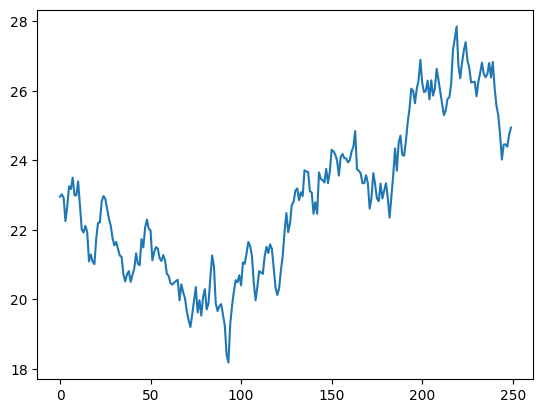

In [12]:
from sklearn.linear_model import LinearRegression
def calc_beta(y, x):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    return model.coef_[0]

def get_spread(y, x, beta):
    return y - beta * x

train_coints = np.load("./train_successful_coints.npy")
flat_indices = np.argsort(train_coints, axis=None)[::-1]
row_indices, col_indices = np.unravel_index(flat_indices, train_coints.shape)

Y = test_prices[row_indices[0]]
X = test_prices[col_indices[0]]
beta = calc_beta(Y, X)
(pd.Series(Y - X)).plot() # Plot the spread

In [ ]:
from statsmodels.tsa.stattools import coint

def rolling_lagged_cointegration(series1, series2, window=90, lag=1):
    pvals = []
    for start in range(len(series1) - window - lag + 1):
        end = start + window
        s1_window = series1[start:end]
        s2_window = series2[start+lag:end+lag]  # lagged version
        if len(s1_window) == len(s2_window):
            score, pvalue, _ = coint(s1_window, s2_window)
            pvals.append(pvalue)
        else:
            pvals.append(np.nan)
    return np.array(pvals)

windows = [60, 120, 180]
lags = [-200, -100, -50, -10, 0, 5, 50, 100, 200]
coints = np.zeros((50, 50, len(windows), len(lags)))

for i in range(50):
    for j in range(i+1, 50):
        for window in range(len(windows)):
            for lag in range(len(lags)):
                pvals = rolling_lagged_cointegration(train_prices[0], train_prices[1], window=windows[window], lag=lags[lag])
                coints[i][j][window][lag] = np.sum(pvals < 0.05) / len(pvals)
                print(f"({i}, {j}) window:", window, "lag", lag, ":", np.sum(pvals < 0.05) / len(pvals) * 100)

(0, 1) window: 0 lag 0 : 2.9641185647425896
(0, 1) window: 0 lag 1 : 9.796672828096119
(0, 1) window: 0 lag 2 : 6.517311608961303
(0, 1) window: 0 lag 3 : 3.1042128603104215
(0, 1) window: 0 lag 4 : 20.861678004535147
(0, 1) window: 0 lag 5 : 17.431192660550458
(0, 1) window: 0 lag 6 : 3.0690537084398977
(0, 1) window: 0 lag 7 : 4.398826979472141
(0, 1) window: 0 lag 8 : 11.618257261410788
(0, 1) window: 1 lag 0 : 0.0
(0, 1) window: 1 lag 1 : 0.6237006237006237
(0, 1) window: 1 lag 2 : 6.496519721577726
(0, 1) window: 1 lag 3 : 10.741687979539643
(0, 1) window: 1 lag 4 : 4.986876640419948
(0, 1) window: 1 lag 5 : 8.51063829787234
(0, 1) window: 1 lag 6 : 3.0211480362537766
(0, 1) window: 1 lag 7 : 0.0
(0, 1) window: 1 lag 8 : 1.1049723756906076
(0, 1) window: 2 lag 0 : 0.0
(0, 1) window: 2 lag 1 : 1.187648456057007
(0, 1) window: 2 lag 2 : 13.20754716981132
(0, 1) window: 2 lag 3 : 6.042296072507553
(0, 1) window: 2 lag 4 : 4.049844236760125
(0, 1) window: 2 lag 5 : 2.848101265822785
(